In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import keras

In [2]:
url = 'diabetes.csv'
df =pd.read_csv(url)

In [3]:
df.tail()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,2.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0
253679,2.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,6.0,2.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [5]:
df.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [6]:
def convert_values(value):
    if value == 0:
        return 0
    else:
        return 1


X = df.drop(['Diabetes_012','Education'],axis=1)
df['Diabetes_012'] = df['Diabetes_012'].apply(convert_values)

y = df['Diabetes_012']

In [7]:
from sklearn.preprocessing import StandardScaler
min_max_scaler = StandardScaler()
X = min_max_scaler.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_test.shape}')

Train : (202944, 20), Test : (50736, 20)


In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size = 0.2, random_state = 0)
print(f'Train : {X_train.shape}, Test : {X_val.shape}')

Train : (162355, 20), Test : (40589, 20)


In [10]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(4, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                336       
                                                                 
 dense_1 (Dense)             (None, 4)                 68        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 409 (1.60 KB)
Trainable params: 409 (1.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=10,mode='max',verbose=1)
checkpoint = ModelCheckpoint('lab1_1_weights-{epoch:02d}-{val_accuracy:.3f}.hdf5',
                              monitor='val_accuracy',verbose=1,mode='max',
                              save_best_only=True)
callbacks_list=[early_stop,checkpoint]
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
model_history = model.fit(X_train, y_train, batch_size=32,
                     validation_data=(X_val,y_val), callbacks=callbacks_list, epochs=30)

Epoch 1/30
5074/5074 [==============================] - ETA: 0s - loss: 0.3586 - accuracy: 0.8398
Epoch 1: val_accuracy improved from -inf to 0.84873, saving model to lab1_1_weights-01-0.849.hdf5
5074/5074 [==============================] - 6s 1ms/step - loss: 0.3586 - accuracy: 0.8398 - val_loss: 0.3405 - val_accuracy: 0.8487
Epoch 2/30
 178/5074 [>.............................] - ETA: 4s - loss: 0.3326 - accuracy: 0.8597

C:\Users\shevy\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5047/5074 [============================>.] - ETA: 0s - loss: 0.3415 - accuracy: 0.8497
Epoch 2: val_accuracy improved from 0.84873 to 0.85003, saving model to lab1_1_weights-02-0.850.hdf5
5074/5074 [==============================] - 5s 1ms/step - loss: 0.3415 - accuracy: 0.8498 - val_loss: 0.3390 - val_accuracy: 0.8500
Epoch 3/30
5066/5074 [============================>.] - ETA: 0s - loss: 0.3403 - accuracy: 0.8508
Epoch 3: val_accuracy improved from 0.85003 to 0.85040, saving model to lab1_1_weights-03-0.850.hdf5
5074/5074 [==============================] - 5s 1ms/step - loss: 0.3403 - accuracy: 0.8508 - val_loss: 0.3393 - val_accuracy: 0.8504
Epoch 4/30
5056/5074 [============================>.] - ETA: 0s - loss: 0.3400 - accuracy: 0.8507
Epoch 4: val_accuracy did not improve from 0.85040
5074/5074 [==============================] - 5s 984us/step - loss: 0.3400 - accuracy: 0.8507 - val_loss: 0.3381 - val_accuracy: 0.8503
Epoch 5/30
5064/5074 [============================>.] - ETA: 0s

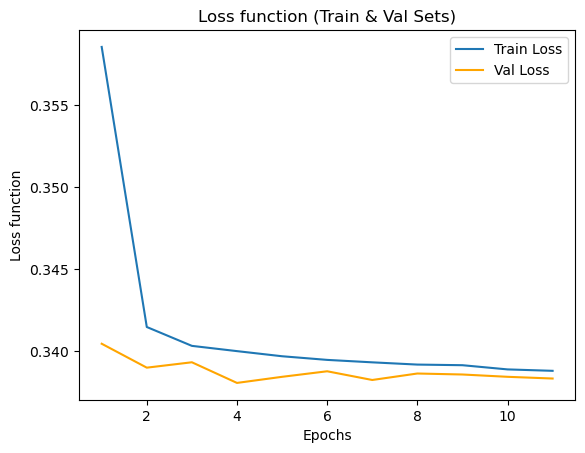

In [14]:
loss_function = model_history.history['loss']
val_loss_function = model_history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Loss function (Train & Val Sets)')
plt.plot(epochs,loss_function,label='Train Loss')
plt.plot(epochs,val_loss_function,color='orange',label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss function')
plt.legend()
plt.show()

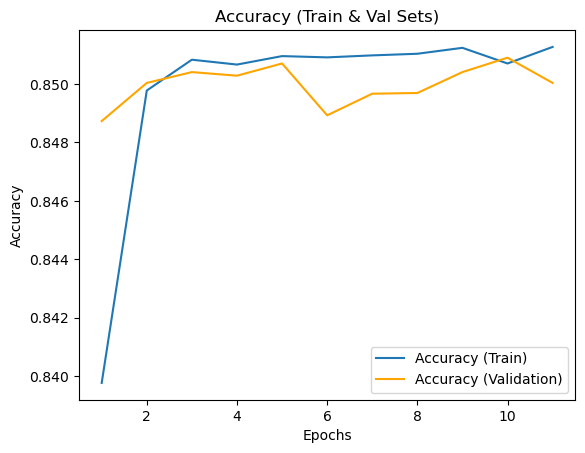

In [15]:
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
epochs = range(1,len(acc)+1)

plt.title('Accuracy (Train & Val Sets)')
plt.plot(epochs,acc,label='Accuracy (Train)')
plt.plot(epochs,val_acc,color='orange',label='Accuracy (Validation)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of y_val:", y_val.shape)

Shape of X_train: (162355, 20)
Shape of y_train: (162355,)
Shape of X_val: (40589, 20)
Shape of y_val: (40589,)


In [17]:
y_val_pred = model.predict(X_val)

1269/1269 [==============================] - 1s 618us/step


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report

threshold = 0.5 

y_val_binary_pred = (y_val_pred > threshold).astype(int)

# Compute metrics
accuracy = accuracy_score(y_val, y_val_binary_pred)
precision = precision_score(y_val, y_val_binary_pred)
recall = recall_score(y_val, y_val_binary_pred)
roc_auc = roc_auc_score(y_val, y_val_pred)

In [19]:
conf_matrix = confusion_matrix(y_val, y_val_binary_pred)
class_report = classification_report(y_val, y_val_binary_pred)

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[33267   926]
 [ 5161  1235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     34193
           1       0.57      0.19      0.29      6396

    accuracy                           0.85     40589
   macro avg       0.72      0.58      0.60     40589
weighted avg       0.82      0.85      0.82     40589



1586/1586 [==============================] - 1s 595us/step
Metrics on Test Set:
      Metric     Value
0   Accuracy  0.851821
1  Precision  0.588761
2     Recall  0.197874
3    ROC AUC  0.827565


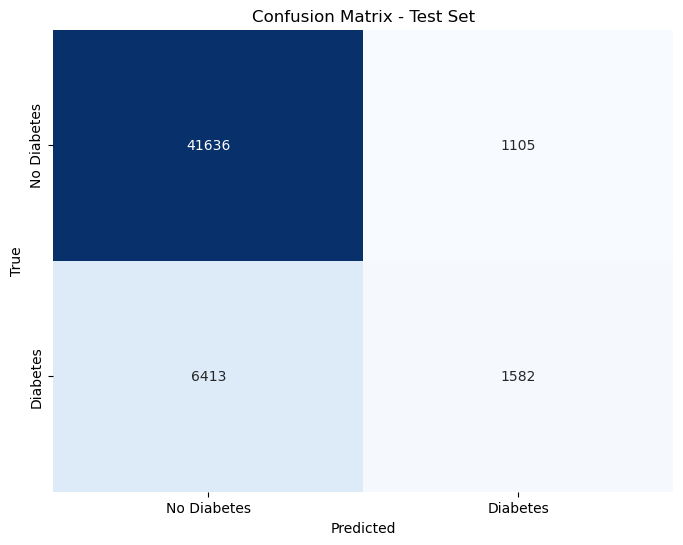


Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     42741
           1       0.59      0.20      0.30      7995

    accuracy                           0.85     50736
   macro avg       0.73      0.59      0.61     50736
weighted avg       0.82      0.85      0.82     50736



In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report

# Получение предсказаний для тестовой выборки
y_test_pred = model.predict(X_test)
y_test_binary_pred = (y_test_pred > 0.5).astype(int)

# Вычисление метрик качества
accuracy_test = accuracy_score(y_test, y_test_binary_pred)
precision_test = precision_score(y_test, y_test_binary_pred)
recall_test = recall_score(y_test, y_test_binary_pred)
roc_auc_test = roc_auc_score(y_test, y_test_pred)

# Вычисление матрицы ошибок
conf_matrix_test = confusion_matrix(y_test, y_test_binary_pred)

# Вывод Classification Report
class_report_test = classification_report(y_test, y_test_binary_pred)

# Вывод метрик качества на тестовой выборке в виде таблицы
metrics_table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'ROC AUC'],
    'Value': [accuracy_test, precision_test, recall_test, roc_auc_test]
})

print("Metrics on Test Set:")
print(metrics_table)

# Визуализация матрицы ошибок
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Вывод Classification Report
print("\nClassification Report on Test Set:")
print(class_report_test)


1269/1269 [==============================] - 1s 640us/step


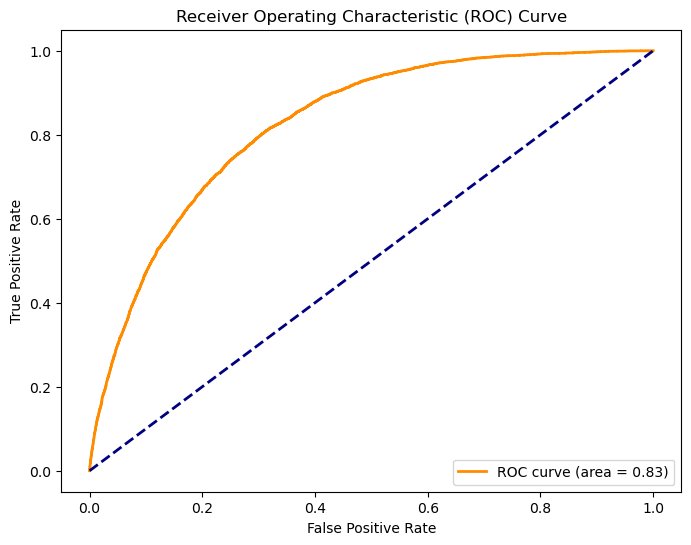

In [21]:
from sklearn.metrics import roc_curve, auc

# Получение предсказаний для ROC-кривых
y_val_pred = model.predict(X_val)

# Вычисление ROC-кривой и площади под кривой (AUC) для каждого класса
fpr, tpr, _ = roc_curve(y_val, y_val_pred)
roc_auc = auc(fpr, tpr)

# Построение ROC-кривых
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()